**1.4 Growth without preferential attachment**

First, we will grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create Sune-Network

G4s = nx.Graph()
G4s.add_edge(0, 1)

def add_node_with_eq_prob(G4s):   
    all_nodes = list(G4s.nodes)
    new_node = len(all_nodes)
    p = 1 / len(all_nodes)
    p_list = [p] * len(all_nodes)
    chosen_node = np.random.choice(all_nodes, p=p_list)
    G4s.add_edge(new_node, chosen_node)
    return G4s

for i in range(5000):
    add_node_with_eq_prob(G4s)

/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_1691/564454300.py:7: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G4s, pos, edge_color=edge_colors, alpha=0.5, width=1.2)
/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_1691/564454300.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node Degree')


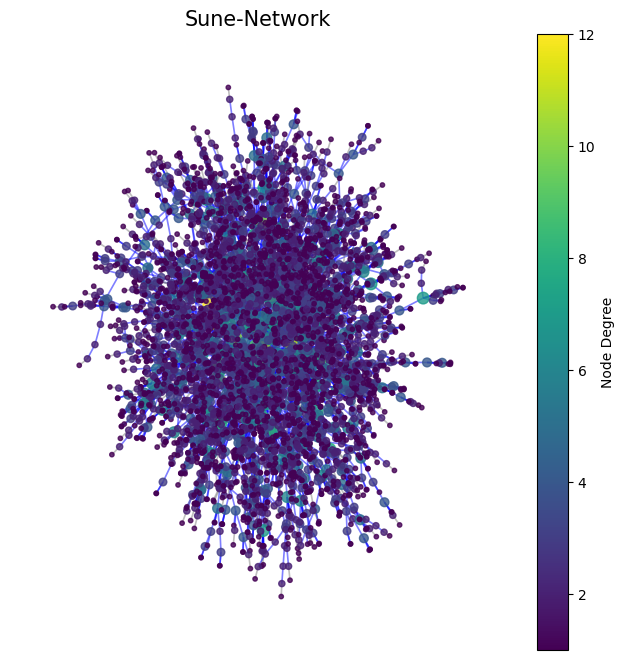

In [3]:
#Visualize the Sune-Network
node_sizes = [G4s.degree(n) * 10 for n in G4s.nodes()]
node_colors = [G4s.degree(n) for n in G4s.nodes()]
edge_colors = ['gray' if G4s.degree(edge[0]) + G4s.degree(edge[1]) < 4 else 'blue' for edge in G4s.edges()]
plt.figure(figsize=(8, 8)) 
pos = nx.spring_layout(G4s, seed=42)
nx.draw_networkx_nodes(G4s, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)
nx.draw_networkx_edges(G4s, pos, edge_color=edge_colors, alpha=0.5, width=1.2)
plt.axis('off')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Node Degree')

plt.title("Sune-Network", fontsize=15)
plt.show()

Now, we will generate an ER network of same number of nodes and links as the Sune-network. 

In [4]:
#Create ER Network
num_edges = G4s.number_of_edges()
G4er = nx.gnm_random_graph(5000, num_edges)

/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_1691/4147770244.py:9: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G4er, pos, edge_color=edge_colors, alpha=0.5, width=1.2)
/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_1691/4147770244.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node Degree')


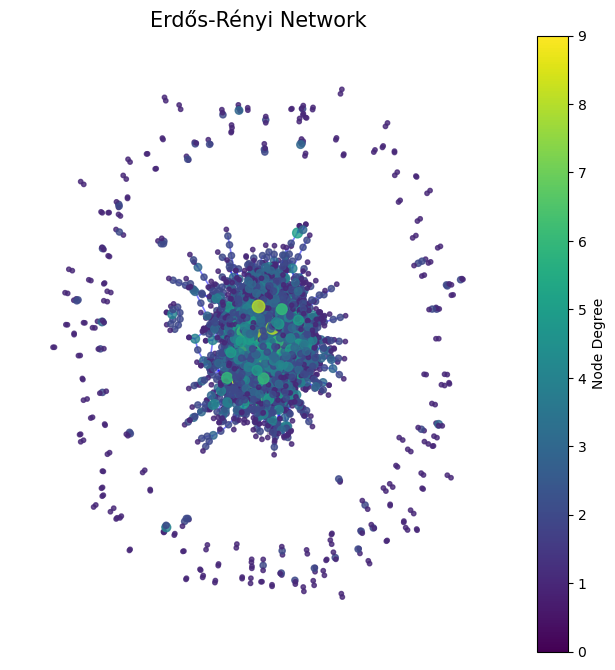

In [5]:
#Visualize ER Network

node_sizes = [G4er.degree(n) * 10 for n in G4er.nodes()]  # Adjusted size scaling
node_colors = [G4er.degree(n) for n in G4er.nodes()]
edge_colors = ['gray' if G4er.degree(edge[0]) + G4er.degree(edge[1]) < 4 else 'blue' for edge in G4er.edges()]
plt.figure(figsize=(8, 8)) 
pos = nx.spring_layout(G4er, seed=42)
nx.draw_networkx_nodes(G4er, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)
nx.draw_networkx_edges(G4er, pos, edge_color=edge_colors, alpha=0.5, width=1.2)
plt.axis('off')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Node Degree')

plt.title("Erdős-Rényi Network", fontsize=15)
plt.show()

What are the differences between the ER network and the Sune-network?

To understand this, we will plot the two degree distribution in the same plot.

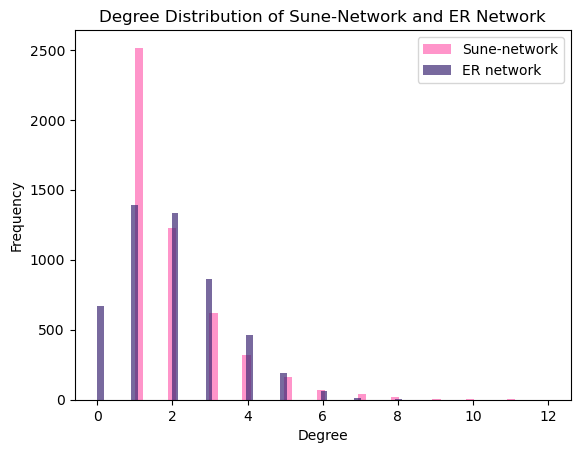

In [6]:
import matplotlib.pyplot as plt

sune_degrees = [G4s.degree(n) for n in G4s.nodes()]
er_degrees = [G4er.degree(n) for n in G4er.nodes()]

plt.hist(sune_degrees, bins=50, alpha=0.7, label='Sune-network', color='#FF69B4')  # Pink
plt.hist(er_degrees, bins=50, alpha=0.7, label='ER network', color='#3F2975')  # Purple
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.title("Degree Distribution of Sune-Network and ER Network")
plt.show()


The Sune-network was generated by connecting new nodes to existing ones with equal probability. Degrees of its nodes are concentrated on 1 or 2. The reason for this is that each new node connects randomly, and existing nodes have an equal chance of being selected, meaning few nodes have considerably higher degree.

On the other hand, degrees of ER network are distributed in more bell-shaped, most of the nodes having a degree around average.

In [41]:
num_components_sune = nx.number_connected_components(G4s)
num_components_er = nx.number_connected_components(G4er)

print(f'Number of connected components in Sune-network: {num_components_sune}')
print(f'Number of connected components in ER network: {num_components_er}')


Number of connected components in Sune-network: 1
Number of connected components in ER network: 830


In the generating process of Sune-Network, each new node is guaranteed to connect to existing nodes, which ensures connectivity. Therefore, it remains as a single component as it grows.

Even though the ER network has the same number of nodes and edges, randomly distributed edges can can result in many small disconnected components.